# **Carga de Datos**

Puesto que se tratan de archivos de mas de 25MB, no se pueden subir al github desde el entorno web si no que hemos de hacer un clone del repositorio con git y hacer un push de nuestro repositorio local a github.
Una vez estan cargados los datos diferenciaremos 4 variables, *trainCsvWithTarget* y *target* las utilizaremos para el analisis de datos mientras que *trainCsv* y *testCsv* seran utilizadas en el procesamiento de estos.

In [34]:
import pandas as pd

trainCsvWithTarget = pd.read_csv('https://raw.githubusercontent.com/jgculebras/CsgoRoundPredict/main/CsvFiles/train.csv')
testCsv = pd.read_csv('https://raw.githubusercontent.com/jgculebras/CsgoRoundPredict/main/CsvFiles/test.csv')


target = trainCsvWithTarget['round_winner']
trainCsv = trainCsvWithTarget.drop(['round_winner', 'round_winner.1'], axis = 1)

# **Analisis de Datos**

Desplegamos algunas graficas que nos ayudaran a entender mejor el problema y con los datos que estamos trabajando, en ellas podemos ver:
- Una comparativa de las rondas ganadas por cada bando en caso de que se plante la bomba o no.
- Las rondas ganadas de cada bando en funcion del mapa elegido.
- Una comparativa estimada de las rondas ganadas por cada bando en funcion de los kits que haya en el equipo CT.
- Las rondas ganadas por cada bando en este conjunto de datos.
- Por ultimo echamos un vistazo a la grafica 'time_left' que nos parecia extraña ya que contenia muchos valores que no encuadraban con el problema. (Esta está analizada en al final del cuaderno)


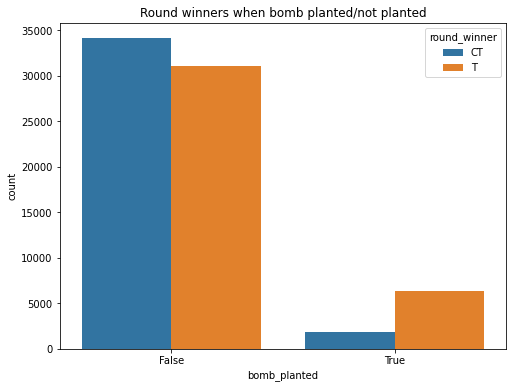

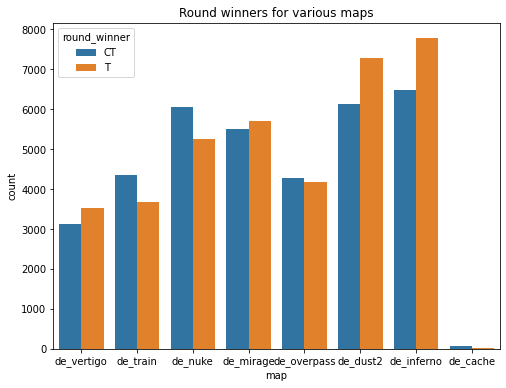

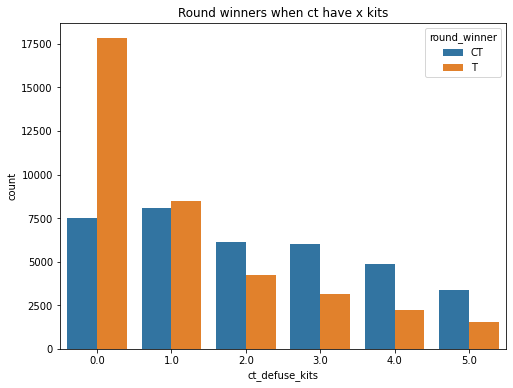

<Figure size 576x432 with 0 Axes>

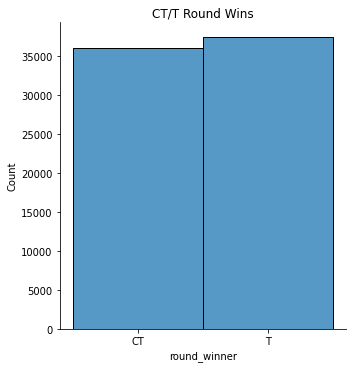

<Figure size 576x432 with 0 Axes>

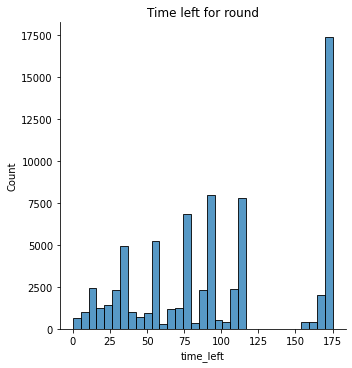

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
ax = sns.countplot(x="bomb_planted", hue="round_winner", data=trainCsvWithTarget)
ax.set(title='Round winners when bomb planted/not planted')
plt.show()

plt.figure(figsize=(8,6))
ax = sns.countplot(x="map", hue="round_winner", data=trainCsvWithTarget)
ax.set(title='Round winners for various maps')
plt.show()

plt.figure(figsize=(8,6))
ax = sns.countplot(x="ct_defuse_kits", hue="round_winner", data=trainCsvWithTarget)
ax.set(title='Round winners when ct have x kits')
plt.show()

plt.figure(figsize=(8,6))
ax = sns.displot(x="round_winner", data=trainCsvWithTarget)
ax.set(title='CT/T Round Wins')
plt.show()

plt.figure(figsize=(8,6))
ax = sns.displot(x="time_left", data=trainCsv)
ax.set(title='Time left for round')
plt.show()

Por ultimo respecto al analisis de datos, queriamos observar un porcentaje estimado de victorias entre cada bando, puesto que el conjunto de datos contiene rondas que no estan del todo equilibradas, realizamos una consulta en donde igualamos la vida de cada bando a la correspondiente de inicio de ronda para generalizar mas el resultado.

In [36]:
array = []
for index, row in trainCsvWithTarget.iterrows():
  if (row['ct_health'] == 500 and row['t_health'] == 500):
    array.append(row['round_winner'])

Como vemos, el bando CT gana mas rondas que el equipo T, algo que se ajusta mas a la realidad.

In [37]:
import numpy as np

(unique, counts) = np.unique(array, return_counts=True)

frequencies = np.asarray((unique, counts)).T

print(frequencies)

[['CT' '18070']
 ['T' '17295']]


# **Preprocesamiento de Datos**

**Calculo valor equipamiento Ronda**

Creemos conveniente realizar una conversion de las armas/equipamiento que lleva cada bando en cada ronda a su valor en el juego, para ello exploramos cada fila del dataset y las columnas que nos indican las armas/granadas de cada bando multiplicando estas por su correspondiente valor, extraido de *https://counterstrike.fandom.com/wiki/Buy_menu*

In [38]:
ctWeaponValueArray = []
ctWeaponValue = 0

ct2ndWeaponValueArray = []
ct2ndWeaponValue = 0


tWeaponValueArray = []
tWeaponValue = 0

t2ndWeaponValueArray = []
t2ndWeaponValue = 0

ctGranadeValueArray = []
ctGranadeValue = 0


tGranadeValueArray = []
tGranadeValue = 0



for index, row in trainCsv.iterrows():
  ctWeaponValue += row['ct_weapon_ak47'] * 2700
  tWeaponValue += row['t_weapon_ak47'] * 2700
  ctWeaponValue += row['ct_weapon_aug'] * 3300
  tWeaponValue += row['t_weapon_aug'] * 3300
  ctWeaponValue += row['ct_weapon_awp'] * 4750
  tWeaponValue += row['t_weapon_awp'] * 4750
  ctWeaponValue += row['ct_weapon_bizon'] * 1400
  tWeaponValue += row['t_weapon_bizon'] * 1400
  ctWeaponValue += row['ct_weapon_famas'] * 2050
  tWeaponValue += row['t_weapon_famas'] * 2050
  ctWeaponValue += row['ct_weapon_g3sg1'] * 5000
  tWeaponValue += row['t_weapon_g3sg1'] * 5000
  ctWeaponValue += row['ct_weapon_galilar'] * 1800
  tWeaponValue += row['t_weapon_galilar'] * 1800
  ctWeaponValue += row['ct_weapon_m249'] * 5200
  tWeaponValue += row['t_weapon_m249'] * 5200
  ctWeaponValue += row['ct_weapon_m4a1s'] * 2900
  tWeaponValue += row['t_weapon_m4a1s'] * 2900
  ctWeaponValue += row['ct_weapon_m4a4'] * 3100
  tWeaponValue += row['t_weapon_m4a4'] * 3100
  ctWeaponValue += row['ct_weapon_mac10'] * 1050
  tWeaponValue += row['t_weapon_mac10'] * 1050
  ctWeaponValue += row['ct_weapon_mag7'] * 1300
  tWeaponValue += row['t_weapon_mag7'] * 1300
  ctWeaponValue += row['ct_weapon_mp5sd'] * 1500
  tWeaponValue += row['t_weapon_mp5sd'] * 1500
  ctWeaponValue += row['ct_weapon_mp7'] * 1500
  tWeaponValue += row['t_weapon_mp7'] * 1500
  ctWeaponValue += row['ct_weapon_mp9'] * 1250
  tWeaponValue += row['t_weapon_mp9'] * 1250
  ctWeaponValue += row['ct_weapon_negev'] * 1700
  tWeaponValue += row['t_weapon_negev'] * 1700
  ctWeaponValue += row['ct_weapon_nova'] * 1050
  tWeaponValue += row['t_weapon_nova'] * 1050
  ctWeaponValue += row['ct_weapon_p90'] * 2350
  tWeaponValue += row['t_weapon_p90'] * 2350
  ctWeaponValue += row['ct_weapon_sawedoff'] * 1100
  tWeaponValue += row['t_weapon_sawedoff'] * 1100
  ctWeaponValue += row['ct_weapon_scar20'] * 5000
  tWeaponValue += row['t_weapon_scar20'] * 5000
  ctWeaponValue += row['ct_weapon_sg553'] * 3000
  tWeaponValue += row['t_weapon_sg553'] * 3000
  ctWeaponValue += row['ct_weapon_ssg08'] * 1700
  tWeaponValue += row['t_weapon_ssg08'] * 1700
  ctWeaponValue += row['ct_weapon_ump45'] * 1200
  tWeaponValue += row['t_weapon_ump45'] * 1200
  ctWeaponValue += row['ct_weapon_xm1014'] * 2000
  tWeaponValue += row['t_weapon_xm1014'] * 2000

  ct2ndWeaponValue += row['ct_weapon_cz75auto'] * 500
  t2ndWeaponValue += row['t_weapon_cz75auto'] * 500
  ct2ndWeaponValue += row['ct_weapon_elite'] * 400
  t2ndWeaponValue += row['t_weapon_elite'] * 400
  ct2ndWeaponValue += row['ct_weapon_glock'] * 200
  t2ndWeaponValue += row['t_weapon_glock'] * 200
  ct2ndWeaponValue += row['ct_weapon_r8revolver'] * 600
  t2ndWeaponValue += row['t_weapon_r8revolver'] * 600
  ct2ndWeaponValue += row['ct_weapon_deagle'] * 700
  t2ndWeaponValue += row['t_weapon_deagle'] * 700
  ct2ndWeaponValue += row['ct_weapon_fiveseven'] * 500
  t2ndWeaponValue += row['t_weapon_fiveseven'] * 500
  ct2ndWeaponValue += row['ct_weapon_usps'] * 200
  t2ndWeaponValue += row['t_weapon_usps'] * 200
  ct2ndWeaponValue += row['ct_weapon_p250'] * 300
  t2ndWeaponValue += row['t_weapon_p250'] * 300
  ct2ndWeaponValue += row['ct_weapon_p2000'] * 200
  t2ndWeaponValue += row['t_weapon_p2000'] * 200
  ct2ndWeaponValue += row['ct_weapon_tec9'] * 500
  t2ndWeaponValue += row['t_weapon_tec9'] * 500

  ctGranadeValue += row['ct_grenade_hegrenade'] * 300
  tGranadeValue += row['t_grenade_hegrenade'] * 300
  ctGranadeValue += row['ct_grenade_flashbang'] * 200
  tGranadeValue += row['t_grenade_flashbang'] * 200
  ctGranadeValue += row['ct_grenade_smokegrenade'] * 300
  tGranadeValue += row['t_grenade_smokegrenade'] * 300
  ctGranadeValue += row['ct_grenade_incendiarygrenade'] * 600
  tGranadeValue += row['t_grenade_incendiarygrenade'] * 600
  ctGranadeValue += row['ct_grenade_molotovgrenade'] * 400
  tGranadeValue += row['t_grenade_molotovgrenade'] * 400
  ctGranadeValue += row['ct_grenade_decoygrenade'] * 50
  tGranadeValue += row['t_grenade_decoygrenade'] * 50


  ctWeaponValueArray.append(ctWeaponValue)
  tWeaponValueArray.append(tWeaponValue)

  ct2ndWeaponValueArray.append(ct2ndWeaponValue)
  t2ndWeaponValueArray.append(t2ndWeaponValue)

  ctGranadeValueArray.append(ctGranadeValue)
  tGranadeValueArray.append(tGranadeValue)

  tWeaponValue = 0
  ctWeaponValue = 0

  t2ndWeaponValue = 0
  ct2ndWeaponValue = 0

  ctGranadeValue = 0
  tGranadeValue = 0

Creamos un DataFrame con estos datos que utilizaremos mas tarde.

In [39]:
eqValue = pd.DataFrame(list(zip(ctWeaponValueArray, tWeaponValueArray, ct2ndWeaponValueArray, t2ndWeaponValueArray, ctGranadeValueArray, tGranadeValueArray)), columns = ['ctWeaponValue', 'tWeaponValue', 'ct2ndWeaponValue', 't2ndWeaponValue', 'ctGrenadeValue', 'tGrenadeValue'])
eqValue

,ctWeaponValue,tWeaponValue,ct2ndWeaponValue,t2ndWeaponValue,ctGrenadeValue,tGrenadeValue
0,12000.0,3000.0,1000.0,1000.0,5800.0,200.0
1,0.0,0.0,1300.0,1000.0,500.0,500.0
2,1800.0,5700.0,700.0,600.0,300.0,0.0
3,0.0,0.0,1000.0,1000.0,0.0,0.0
4,0.0,10800.0,1000.0,1500.0,0.0,1300.0
...,...,...,...,...,...,...
73441,1200.0,7650.0,2000.0,1000.0,500.0,5100.0
73442,7850.0,13150.0,1100.0,1000.0,1100.0,1600.0
73443,16750.0,14700.0,1600.0,1000.0,5800.0,5100.0
73444,19000.0,1050.0,2400.0,2400.0,6700.0,500.0


Puesto que ya nos hemos hecho la transformacion de armas a su valor en dinero, y no queremos añadir muchas sentencias drop de cada columna correspondiente a cada arma, guardamos como trainDfTransformed el DataFrame inicial pero sin las columnas de cada arma equipada. En la siguiente sentencia lo concatenamos con el DataFrame de la celda anterior obteniendo asi nuestro DataFrame completo.

Posteriormente utilizaremos LabelEncoder y OneHotEncoder para transformar las columnas 'map', 'bomb_planted' y el target ('round_winner')

In [40]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

trainDfTransformed = trainCsv[['ct_score' , 't_score' , 'time_left', 'map' , 'bomb_planted' , 'ct_health' , 't_health' , 'ct_armor' , 't_armor' , 'ct_money', 't_money' , 'ct_helmets' , 't_helmets' , 'ct_defuse_kits' , 'ct_players_alive' , 't_players_alive']]
trainDfTransformed = pd.concat([trainDfTransformed, eqValue], axis = 1)

trainDfTransformed['map'] = LabelEncoder().fit_transform(trainDfTransformed['map'])

bombPlantedDf = pd.DataFrame(OneHotEncoder().fit_transform(trainDfTransformed[['bomb_planted']]).toarray(), columns = ['no_bomb_planted', 'yes_bomb_planted'])

trainDfTransformed = pd.concat((trainDfTransformed , bombPlantedDf) , axis = 1)

trainDfTransformed = trainDfTransformed.drop(['bomb_planted'], axis = 1)

target = pd.DataFrame(LabelEncoder().fit_transform(target), columns = ['Round_Winner'])
trainDfTransformed

,ct_score,t_score,time_left,map,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ctWeaponValue,tWeaponValue,ct2ndWeaponValue,t2ndWeaponValue,ctGrenadeValue,tGrenadeValue,no_bomb_planted,yes_bomb_planted
0,10.0,12.0,175.00,7,500.0,500.0,500.0,85.0,6550.0,16850.0,5.0,1.0,3.0,5.0,5.0,12000.0,3000.0,1000.0,1000.0,5800.0,200.0,1.0,0.0
1,7.0,8.0,108.16,6,500.0,500.0,300.0,300.0,450.0,650.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,1300.0,1000.0,500.0,500.0,1.0,0.0
2,0.0,1.0,26.15,6,75.0,295.0,93.0,298.0,350.0,2300.0,0.0,3.0,0.0,1.0,3.0,1800.0,5700.0,700.0,600.0,300.0,0.0,0.0,1.0
3,14.0,2.0,174.87,4,500.0,500.0,190.0,0.0,19900.0,15000.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,1000.0,1000.0,0.0,0.0,1.0,0.0
4,8.0,12.0,174.95,3,500.0,500.0,0.0,483.0,26350.0,28850.0,0.0,5.0,0.0,5.0,5.0,0.0,10800.0,1000.0,1500.0,0.0,1300.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73441,5.0,12.0,114.93,2,500.0,500.0,288.0,441.0,11800.0,10450.0,2.0,5.0,1.0,5.0,5.0,1200.0,7650.0,2000.0,1000.0,500.0,5100.0,1.0,0.0
73442,3.0,2.0,174.93,6,500.0,500.0,177.0,398.0,24000.0,19300.0,2.0,4.0,2.0,5.0,5.0,7850.0,13150.0,1100.0,1000.0,1100.0,1600.0,1.0,0.0
73443,13.0,8.0,114.93,4,500.0,500.0,422.0,500.0,16900.0,1500.0,5.0,5.0,5.0,5.0,5.0,16750.0,14700.0,1600.0,1000.0,5800.0,5100.0,1.0,0.0
73444,12.0,14.0,114.90,3,500.0,500.0,500.0,500.0,23600.0,10150.0,5.0,1.0,5.0,5.0,5.0,19000.0,1050.0,2400.0,2400.0,6700.0,500.0,1.0,0.0


# **Eleccion del modelo**

**Logistic Regression**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_train, X_test, Y_train, Y_test = train_test_split(trainDfTransformed, target, test_size = 0.2)
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(random_state=0).fit(X_train, Y_train)

from sklearn.metrics import classification_report

y_pred = lgr.predict(X_test)

print(classification_report(Y_test, y_pred)) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.74      0.74      0.74      7223
           1       0.75      0.75      0.75      7467

    accuracy                           0.74     14690
   macro avg       0.74      0.74      0.74     14690
weighted avg       0.74      0.74      0.74     14690



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**K-Nearest-Neighbors**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(trainDfTransformed, target, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=4).fit(X_train, Y_train)

from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)

print(classification_report(Y_test, y_pred)) 

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.70      0.84      0.76      7128
           1       0.82      0.66      0.73      7562

    accuracy                           0.75     14690
   macro avg       0.76      0.75      0.75     14690
weighted avg       0.76      0.75      0.75     14690



**Arbol de decision**

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(trainDfTransformed, target, test_size = 0.2)

dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, random_state=43)
dtc = dtc.fit(X_train,Y_train)

from sklearn.metrics import classification_report

y_pred = dtc.predict(X_test)

print(classification_report(Y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.71      0.81      0.75      7221
           1       0.78      0.67      0.72      7469

    accuracy                           0.74     14690
   macro avg       0.74      0.74      0.74     14690
weighted avg       0.75      0.74      0.74     14690



**Gradient Boost Classifier**

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(trainDfTransformed, target, test_size = 0.2)

clf = GradientBoostingClassifier(n_estimators=350, learning_rate=1.0, max_depth=12, random_state=0).fit(X_train, Y_train)

from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(Y_test, y_pred)) 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7126
           1       0.84      0.84      0.84      7564

    accuracy                           0.84     14690
   macro avg       0.84      0.84      0.84     14690
weighted avg       0.84      0.84      0.84     14690



Como podemos ver, el modelo que mejor nos funciona de los casos probados es el Gradient Boosting Classifier, un algoritmo que usa Arboles de Regresion. Los hiperparametros utilizados son para los estimadores 350 y para la profundidad 12, puesto que vimos que a mayor/menor numero de estimadores mas impreciso era y respecto a la profundidad, a mayor profundidad obteniamos mas Overfitting y a menor profundidad era mas impreciso.

# **Prediccion del testCsv**

Como hemos hecho con el trainCsv y para entrenar al modelo, transformamos los datos necesarios para que se ajusten al modelo, y hacemos un predict con el modelo elejido en nuestro caso Gradient Boosting Classifier, en las siguientes sentencias simplemente transformamos los valores binarios a las correspondientes etiquetas ('CT'/'T') como se nos pide en el enunciado y exportamos a Csv con la libreria de pandas.

In [45]:
ctWeaponValueArray = []
ctWeaponValue = 0

ct2ndWeaponValueArray = []
ct2ndWeaponValue = 0


tWeaponValueArray = []
tWeaponValue = 0

t2ndWeaponValueArray = []
t2ndWeaponValue = 0

ctGranadeValueArray = []
ctGranadeValue = 0


tGranadeValueArray = []
tGranadeValue = 0



for index, row in testCsv.iterrows():
  ctWeaponValue += row['ct_weapon_ak47'] * 2700
  tWeaponValue += row['t_weapon_ak47'] * 2700
  ctWeaponValue += row['ct_weapon_aug'] * 3300
  tWeaponValue += row['t_weapon_aug'] * 3300
  ctWeaponValue += row['ct_weapon_awp'] * 4750
  tWeaponValue += row['t_weapon_awp'] * 4750
  ctWeaponValue += row['ct_weapon_bizon'] * 1400
  tWeaponValue += row['t_weapon_bizon'] * 1400
  ctWeaponValue += row['ct_weapon_famas'] * 2050
  tWeaponValue += row['t_weapon_famas'] * 2050
  ctWeaponValue += row['ct_weapon_g3sg1'] * 5000
  tWeaponValue += row['t_weapon_g3sg1'] * 5000
  ctWeaponValue += row['ct_weapon_galilar'] * 1800
  tWeaponValue += row['t_weapon_galilar'] * 1800
  ctWeaponValue += row['ct_weapon_m249'] * 5200
  tWeaponValue += row['t_weapon_m249'] * 5200
  ctWeaponValue += row['ct_weapon_m4a1s'] * 2900
  tWeaponValue += row['t_weapon_m4a1s'] * 2900
  ctWeaponValue += row['ct_weapon_m4a4'] * 3100
  tWeaponValue += row['t_weapon_m4a4'] * 3100
  ctWeaponValue += row['ct_weapon_mac10'] * 1050
  tWeaponValue += row['t_weapon_mac10'] * 1050
  ctWeaponValue += row['ct_weapon_mag7'] * 1300
  tWeaponValue += row['t_weapon_mag7'] * 1300
  ctWeaponValue += row['ct_weapon_mp5sd'] * 1500
  tWeaponValue += row['t_weapon_mp5sd'] * 1500
  ctWeaponValue += row['ct_weapon_mp7'] * 1500
  tWeaponValue += row['t_weapon_mp7'] * 1500
  ctWeaponValue += row['ct_weapon_mp9'] * 1250
  tWeaponValue += row['t_weapon_mp9'] * 1250
  ctWeaponValue += row['ct_weapon_negev'] * 1700
  tWeaponValue += row['t_weapon_negev'] * 1700
  ctWeaponValue += row['ct_weapon_nova'] * 1050
  tWeaponValue += row['t_weapon_nova'] * 1050
  ctWeaponValue += row['ct_weapon_p90'] * 2350
  tWeaponValue += row['t_weapon_p90'] * 2350
  ctWeaponValue += row['ct_weapon_sawedoff'] * 1100
  tWeaponValue += row['t_weapon_sawedoff'] * 1100
  ctWeaponValue += row['ct_weapon_scar20'] * 5000
  tWeaponValue += row['t_weapon_scar20'] * 5000
  ctWeaponValue += row['ct_weapon_sg553'] * 3000
  tWeaponValue += row['t_weapon_sg553'] * 3000
  ctWeaponValue += row['ct_weapon_ssg08'] * 1700
  tWeaponValue += row['t_weapon_ssg08'] * 1700
  ctWeaponValue += row['ct_weapon_ump45'] * 1200
  tWeaponValue += row['t_weapon_ump45'] * 1200
  ctWeaponValue += row['ct_weapon_xm1014'] * 2000
  tWeaponValue += row['t_weapon_xm1014'] * 2000

  ct2ndWeaponValue += row['ct_weapon_cz75auto'] * 500
  t2ndWeaponValue += row['t_weapon_cz75auto'] * 500
  ct2ndWeaponValue += row['ct_weapon_elite'] * 400
  t2ndWeaponValue += row['t_weapon_elite'] * 400
  ct2ndWeaponValue += row['ct_weapon_glock'] * 200
  t2ndWeaponValue += row['t_weapon_glock'] * 200
  ct2ndWeaponValue += row['ct_weapon_r8revolver'] * 600
  t2ndWeaponValue += row['t_weapon_r8revolver'] * 600
  ct2ndWeaponValue += row['ct_weapon_deagle'] * 700
  t2ndWeaponValue += row['t_weapon_deagle'] * 700
  ct2ndWeaponValue += row['ct_weapon_fiveseven'] * 500
  t2ndWeaponValue += row['t_weapon_fiveseven'] * 500
  ct2ndWeaponValue += row['ct_weapon_usps'] * 200
  t2ndWeaponValue += row['t_weapon_usps'] * 200
  ct2ndWeaponValue += row['ct_weapon_p250'] * 300
  t2ndWeaponValue += row['t_weapon_p250'] * 300
  ct2ndWeaponValue += row['ct_weapon_p2000'] * 200
  t2ndWeaponValue += row['t_weapon_p2000'] * 200
  ct2ndWeaponValue += row['ct_weapon_tec9'] * 500
  t2ndWeaponValue += row['t_weapon_tec9'] * 500

  ctGranadeValue += row['ct_grenade_hegrenade'] * 300
  tGranadeValue += row['t_grenade_hegrenade'] * 300
  ctGranadeValue += row['ct_grenade_flashbang'] * 200
  tGranadeValue += row['t_grenade_flashbang'] * 200
  ctGranadeValue += row['ct_grenade_smokegrenade'] * 300
  tGranadeValue += row['t_grenade_smokegrenade'] * 300
  ctGranadeValue += row['ct_grenade_incendiarygrenade'] * 600
  tGranadeValue += row['t_grenade_incendiarygrenade'] * 600
  ctGranadeValue += row['ct_grenade_molotovgrenade'] * 400
  tGranadeValue += row['t_grenade_molotovgrenade'] * 400
  ctGranadeValue += row['ct_grenade_decoygrenade'] * 50
  tGranadeValue += row['t_grenade_decoygrenade'] * 50


  ctWeaponValueArray.append(ctWeaponValue)
  tWeaponValueArray.append(tWeaponValue)

  ct2ndWeaponValueArray.append(ct2ndWeaponValue)
  t2ndWeaponValueArray.append(t2ndWeaponValue)

  ctGranadeValueArray.append(ctGranadeValue)
  tGranadeValueArray.append(tGranadeValue)

  tWeaponValue = 0
  ctWeaponValue = 0

  t2ndWeaponValue = 0
  ct2ndWeaponValue = 0

  ctGranadeValue = 0
  tGranadeValue = 0

eqValue = pd.DataFrame(list(zip(ctWeaponValueArray, tWeaponValueArray, ct2ndWeaponValueArray, t2ndWeaponValueArray, ctGranadeValueArray, tGranadeValueArray)), columns = ['ctWeaponValue', 'tWeaponValue', 'ct2ndWeaponValue', 't2ndWeaponValue', 'ctGrenadeValue', 'tGrenadeValue'])
eqValue

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

XDfTransformed = testCsv[['ct_score' , 't_score' , 'time_left', 'map' , 'bomb_planted' , 'ct_health' , 't_health' , 'ct_armor' , 't_armor' , 'ct_money', 't_money' , 'ct_helmets' , 't_helmets' , 'ct_defuse_kits' , 'ct_players_alive' , 't_players_alive']]
XDfTransformed = pd.concat([XDfTransformed, eqValue], axis = 1)

XDfTransformed['map'] = LabelEncoder().fit_transform(XDfTransformed['map'])

bombPlantedDf = pd.DataFrame(OneHotEncoder().fit_transform(XDfTransformed[['bomb_planted']]).toarray(), columns = ['no_bomb_planted', 'yes_bomb_planted'])

XDfTransformed = pd.concat((XDfTransformed , bombPlantedDf) , axis = 1)

XDfTransformed = XDfTransformed.drop(['bomb_planted'], axis = 1)

from sklearn.metrics import classification_report

pred = clf.predict(XDfTransformed)

df = pd.DataFrame(pred, columns = ['Round_Winner'])
df.loc[df.Round_Winner == 0, 'Round_Winner'] = 'CT'
df.loc[df.Round_Winner == 1, 'Round_Winner'] = 'T'

df = pd.concat((testCsv['id'], df), axis = 1)

df.to_csv('RoundWinner.csv', index = False, header = ["id", "Round_Winner"], sep = ',')

# **Observacion de la variable 'Time_Left'**

*En caso de que ya se hayan procesado los datos no es necesario ejecutar esta celda.*

In [48]:
ctWeaponValueArray = []
ctWeaponValue = 0

ct2ndWeaponValueArray = []
ct2ndWeaponValue = 0


tWeaponValueArray = []
tWeaponValue = 0

t2ndWeaponValueArray = []
t2ndWeaponValue = 0

ctGranadeValueArray = []
ctGranadeValue = 0


tGranadeValueArray = []
tGranadeValue = 0



for index, row in trainCsv.iterrows():
  ctWeaponValue += row['ct_weapon_ak47'] * 2700
  tWeaponValue += row['t_weapon_ak47'] * 2700
  ctWeaponValue += row['ct_weapon_aug'] * 3300
  tWeaponValue += row['t_weapon_aug'] * 3300
  ctWeaponValue += row['ct_weapon_awp'] * 4750
  tWeaponValue += row['t_weapon_awp'] * 4750
  ctWeaponValue += row['ct_weapon_bizon'] * 1400
  tWeaponValue += row['t_weapon_bizon'] * 1400
  ctWeaponValue += row['ct_weapon_famas'] * 2050
  tWeaponValue += row['t_weapon_famas'] * 2050
  ctWeaponValue += row['ct_weapon_g3sg1'] * 5000
  tWeaponValue += row['t_weapon_g3sg1'] * 5000
  ctWeaponValue += row['ct_weapon_galilar'] * 1800
  tWeaponValue += row['t_weapon_galilar'] * 1800
  ctWeaponValue += row['ct_weapon_m249'] * 5200
  tWeaponValue += row['t_weapon_m249'] * 5200
  ctWeaponValue += row['ct_weapon_m4a1s'] * 2900
  tWeaponValue += row['t_weapon_m4a1s'] * 2900
  ctWeaponValue += row['ct_weapon_m4a4'] * 3100
  tWeaponValue += row['t_weapon_m4a4'] * 3100
  ctWeaponValue += row['ct_weapon_mac10'] * 1050
  tWeaponValue += row['t_weapon_mac10'] * 1050
  ctWeaponValue += row['ct_weapon_mag7'] * 1300
  tWeaponValue += row['t_weapon_mag7'] * 1300
  ctWeaponValue += row['ct_weapon_mp5sd'] * 1500
  tWeaponValue += row['t_weapon_mp5sd'] * 1500
  ctWeaponValue += row['ct_weapon_mp7'] * 1500
  tWeaponValue += row['t_weapon_mp7'] * 1500
  ctWeaponValue += row['ct_weapon_mp9'] * 1250
  tWeaponValue += row['t_weapon_mp9'] * 1250
  ctWeaponValue += row['ct_weapon_negev'] * 1700
  tWeaponValue += row['t_weapon_negev'] * 1700
  ctWeaponValue += row['ct_weapon_nova'] * 1050
  tWeaponValue += row['t_weapon_nova'] * 1050
  ctWeaponValue += row['ct_weapon_p90'] * 2350
  tWeaponValue += row['t_weapon_p90'] * 2350
  ctWeaponValue += row['ct_weapon_sawedoff'] * 1100
  tWeaponValue += row['t_weapon_sawedoff'] * 1100
  ctWeaponValue += row['ct_weapon_scar20'] * 5000
  tWeaponValue += row['t_weapon_scar20'] * 5000
  ctWeaponValue += row['ct_weapon_sg553'] * 3000
  tWeaponValue += row['t_weapon_sg553'] * 3000
  ctWeaponValue += row['ct_weapon_ssg08'] * 1700
  tWeaponValue += row['t_weapon_ssg08'] * 1700
  ctWeaponValue += row['ct_weapon_ump45'] * 1200
  tWeaponValue += row['t_weapon_ump45'] * 1200
  ctWeaponValue += row['ct_weapon_xm1014'] * 2000
  tWeaponValue += row['t_weapon_xm1014'] * 2000

  ct2ndWeaponValue += row['ct_weapon_cz75auto'] * 500
  t2ndWeaponValue += row['t_weapon_cz75auto'] * 500
  ct2ndWeaponValue += row['ct_weapon_elite'] * 400
  t2ndWeaponValue += row['t_weapon_elite'] * 400
  ct2ndWeaponValue += row['ct_weapon_glock'] * 200
  t2ndWeaponValue += row['t_weapon_glock'] * 200
  ct2ndWeaponValue += row['ct_weapon_r8revolver'] * 600
  t2ndWeaponValue += row['t_weapon_r8revolver'] * 600
  ct2ndWeaponValue += row['ct_weapon_deagle'] * 700
  t2ndWeaponValue += row['t_weapon_deagle'] * 700
  ct2ndWeaponValue += row['ct_weapon_fiveseven'] * 500
  t2ndWeaponValue += row['t_weapon_fiveseven'] * 500
  ct2ndWeaponValue += row['ct_weapon_usps'] * 200
  t2ndWeaponValue += row['t_weapon_usps'] * 200
  ct2ndWeaponValue += row['ct_weapon_p250'] * 300
  t2ndWeaponValue += row['t_weapon_p250'] * 300
  ct2ndWeaponValue += row['ct_weapon_p2000'] * 200
  t2ndWeaponValue += row['t_weapon_p2000'] * 200
  ct2ndWeaponValue += row['ct_weapon_tec9'] * 500
  t2ndWeaponValue += row['t_weapon_tec9'] * 500

  ctGranadeValue += row['ct_grenade_hegrenade'] * 300
  tGranadeValue += row['t_grenade_hegrenade'] * 300
  ctGranadeValue += row['ct_grenade_flashbang'] * 200
  tGranadeValue += row['t_grenade_flashbang'] * 200
  ctGranadeValue += row['ct_grenade_smokegrenade'] * 300
  tGranadeValue += row['t_grenade_smokegrenade'] * 300
  ctGranadeValue += row['ct_grenade_incendiarygrenade'] * 600
  tGranadeValue += row['t_grenade_incendiarygrenade'] * 600
  ctGranadeValue += row['ct_grenade_molotovgrenade'] * 400
  tGranadeValue += row['t_grenade_molotovgrenade'] * 400
  ctGranadeValue += row['ct_grenade_decoygrenade'] * 50
  tGranadeValue += row['t_grenade_decoygrenade'] * 50


  ctWeaponValueArray.append(ctWeaponValue)
  tWeaponValueArray.append(tWeaponValue)

  ct2ndWeaponValueArray.append(ct2ndWeaponValue)
  t2ndWeaponValueArray.append(t2ndWeaponValue)

  ctGranadeValueArray.append(ctGranadeValue)
  tGranadeValueArray.append(tGranadeValue)

  tWeaponValue = 0
  ctWeaponValue = 0

  t2ndWeaponValue = 0
  ct2ndWeaponValue = 0

  ctGranadeValue = 0
  tGranadeValue = 0

eqValue = pd.DataFrame(list(zip(ctWeaponValueArray, tWeaponValueArray, ct2ndWeaponValueArray, t2ndWeaponValueArray, ctGranadeValueArray, tGranadeValueArray)), columns = ['ctWeaponValue', 'tWeaponValue', 'ct2ndWeaponValue', 't2ndWeaponValue', 'ctGrenadeValue', 'tGrenadeValue'])

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

trainDfTransformed = trainCsv[['ct_score' , 't_score' , 'time_left', 'map' , 'bomb_planted' , 'ct_health' , 't_health' , 'ct_armor' , 't_armor' , 'ct_money', 't_money' , 'ct_helmets' , 't_helmets' , 'ct_defuse_kits' , 'ct_players_alive' , 't_players_alive']]
trainDfTransformed = pd.concat([trainDfTransformed, eqValue], axis = 1)

trainDfTransformed['map'] = LabelEncoder().fit_transform(trainDfTransformed['map'])

bombPlantedDf = pd.DataFrame(OneHotEncoder().fit_transform(trainDfTransformed[['bomb_planted']]).toarray(), columns = ['no_bomb_planted', 'yes_bomb_planted'])

trainDfTransformed = pd.concat((trainDfTransformed , bombPlantedDf) , axis = 1)

trainDfTransformed = trainDfTransformed.drop(['bomb_planted'], axis = 1)

Realizamos la consulta correspondiente con la cual filtramos el dataset con time_left > 140 que son los valores que no nos cuadraban y los guardamos en un DataFrame.

In [47]:
querry = []

for index, row in trainDfTransformed.iterrows():
  if (row['time_left'] >= 140):
    querry.append(row)
pd.DataFrame(querry)

,ct_score,t_score,time_left,map,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ctWeaponValue,tWeaponValue,ct2ndWeaponValue,t2ndWeaponValue,ctGrenadeValue,tGrenadeValue,no_bomb_planted,yes_bomb_planted
0,10.0,12.0,175.00,7.0,500.0,500.0,500.0,85.0,6550.0,16850.0,5.0,1.0,3.0,5.0,5.0,12000.0,3000.0,1000.0,1000.0,5800.0,200.0,1.0,0.0
3,14.0,2.0,174.87,4.0,500.0,500.0,190.0,0.0,19900.0,15000.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,1000.0,1000.0,0.0,0.0,1.0,0.0
4,8.0,12.0,174.95,3.0,500.0,500.0,0.0,483.0,26350.0,28850.0,0.0,5.0,0.0,5.0,5.0,0.0,10800.0,1000.0,1500.0,0.0,1300.0,1.0,0.0
14,6.0,9.0,175.00,2.0,500.0,500.0,0.0,200.0,3200.0,1900.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,1300.0,1100.0,0.0,200.0,1.0,0.0
17,0.0,0.0,175.00,5.0,500.0,500.0,100.0,300.0,1850.0,450.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,1000.0,1200.0,500.0,200.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73425,9.0,3.0,166.87,5.0,500.0,500.0,0.0,189.0,24350.0,19200.0,0.0,1.0,0.0,5.0,5.0,0.0,7450.0,1000.0,1000.0,0.0,0.0,1.0,0.0
73432,5.0,9.0,174.95,2.0,500.0,500.0,355.0,0.0,45950.0,14250.0,4.0,0.0,4.0,5.0,5.0,13450.0,0.0,2100.0,1000.0,900.0,0.0,1.0,0.0
73436,10.0,6.0,174.93,5.0,500.0,500.0,100.0,0.0,18400.0,11050.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,1200.0,1000.0,0.0,0.0,1.0,0.0
73439,10.0,5.0,164.54,5.0,500.0,500.0,300.0,200.0,1250.0,2000.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,1000.0,1000.0,0.0,200.0,1.0,0.0


Observando las diferentes filas vemos que aunque haya rondas en las cuales uno de los bandos tenga suficiente dinero para comprar armas de mayor valor no lo hacen e incluso en algunas ni lo hacen. Es por ello por lo que creemos que los valores del tiempo de ronda mayor a 115 significan que aun no se ha realizado ninguna compra y los equipos estan decidiendo diferentes estrategias o incluso estan en algun tiempo tecnico. Estos datos nos pueden llegar a afectar a nuestra solucion haciendo que tenga que profundizar mas de lo que deberia hacerlo si estos no estuvieran.